In [14]:
# Question 2 
# Cross validation takes a data group and splits it into groups. The data groups are run 
# through the model. The model's performance for each data group is summed and multipled
# by 1 divided by k (groups). Leave-one-out is the extreme version of cross validation.
# Every data point is its own group and is used to predict one point per set. Then the 
# cycle repeats for another data point being predicted by all others.

# Question 3 
# Training data is used to create the model, validation data is used to judge 
# the performance of the initial model, and test data is run through the model once 
# its validity is deemed good enough. 

# Question 4
# For example, if the word I'm searching for is dog
# Map(k, 'dog') takes all docs with dog in them
# Reduce(k', <'dog'>*) takes all lines with dog and reduce them into multiple giant docs
# Allows for everything to be counted easier than searching document by document for dog.

# Question 6 part 2
# Life caught up to me so I was not able to get the ii) and iii) working. However, I believe
# that the i) is the most accurate becuase that is the pure data. iii) is the second most 
# accurate becuase it relies on trends to fill in the missing pieces. ii) is the least
# accurate becuase it dilutes the data with a new variable. The Decision tree works better
# for this data set because it is relatively small compared to big data. Naive Bayes would be
# more accurate if it was working with an even larger data set.

Decision Tree Accuracy: 0.9655172413793104
Naive Bayes Tree Accuracy: 0.8793103448275862


ValueError: Found input variables with inconsistent numbers of samples: [232, 435]

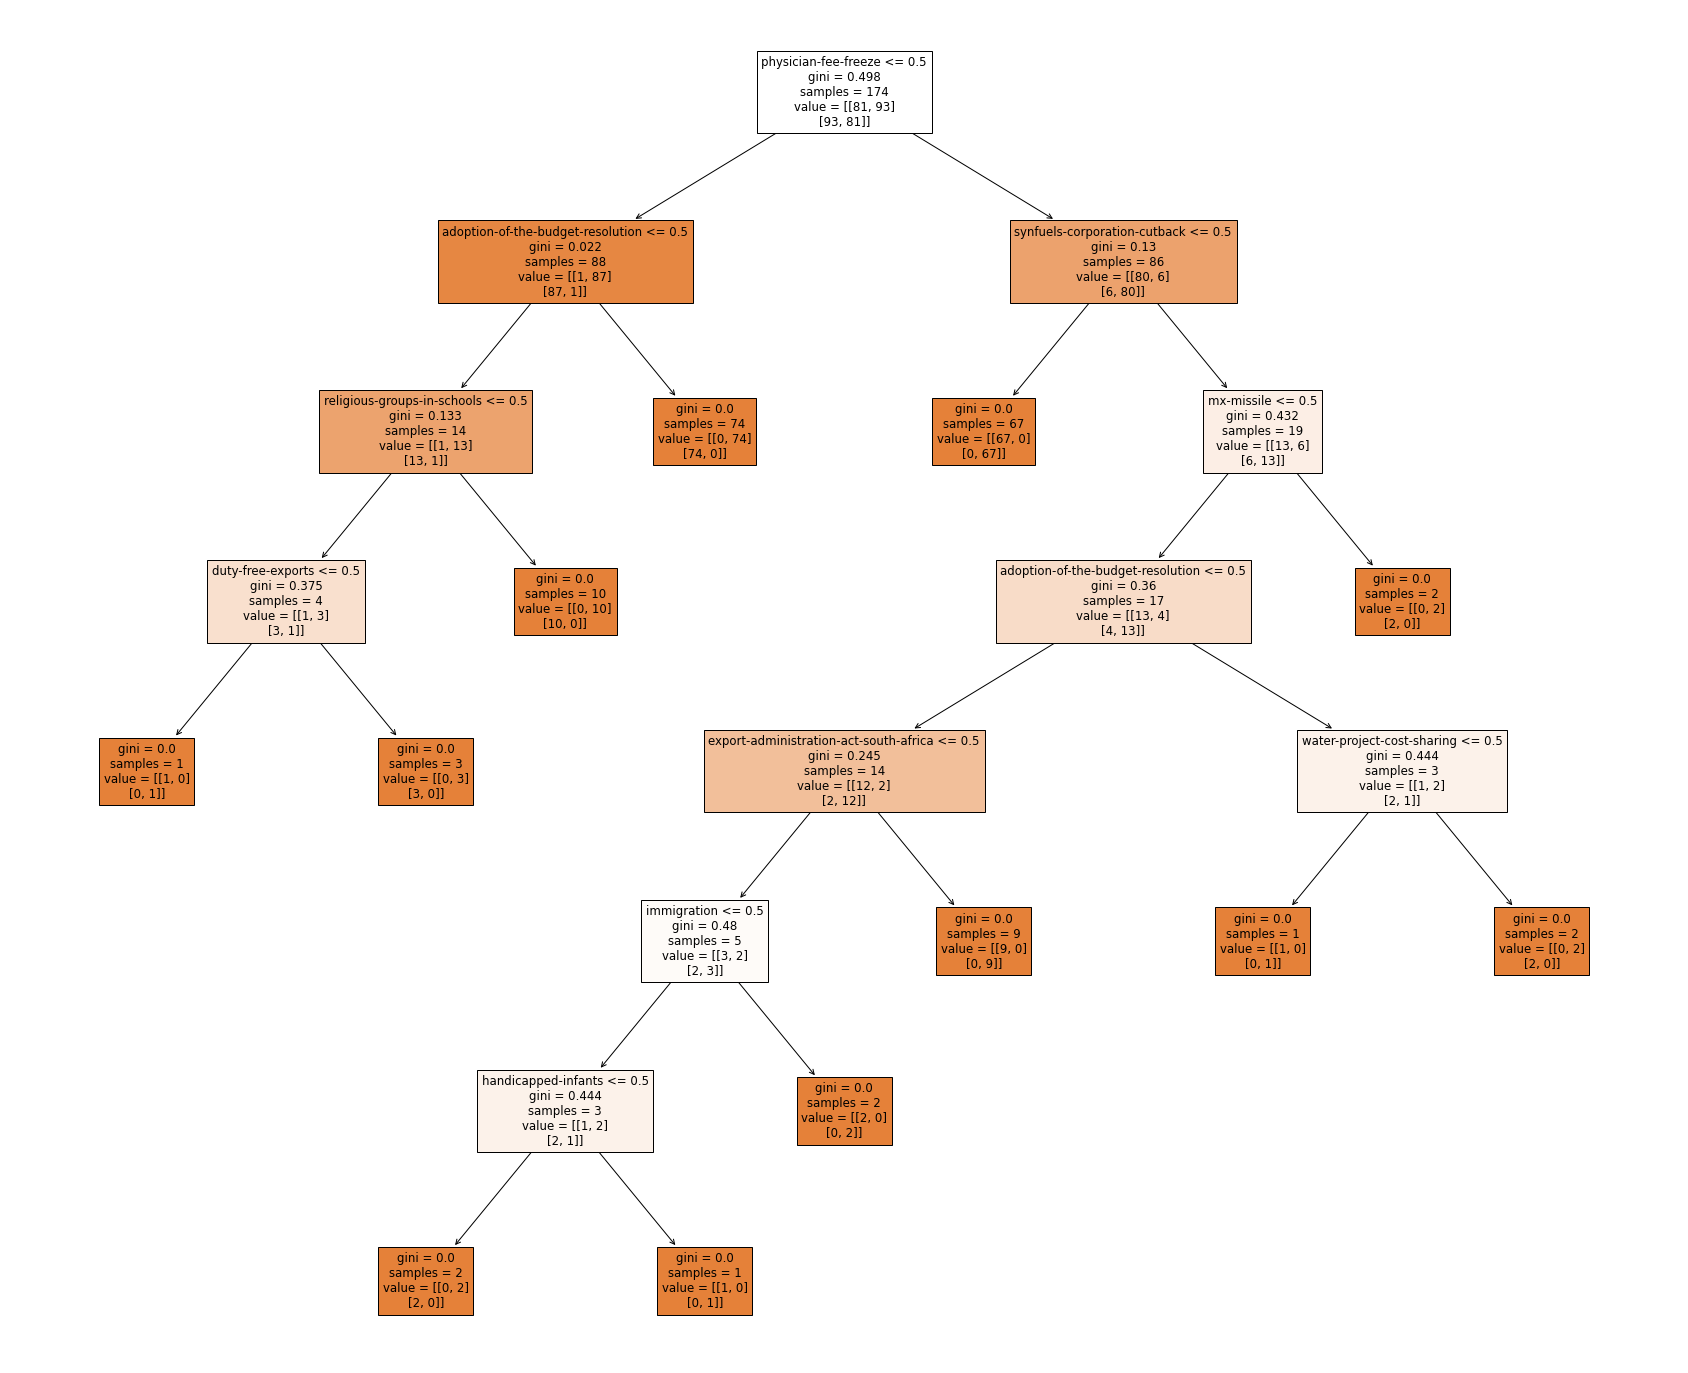

In [13]:
### Assingment 8, Question 5 Thomas Yoxsimer ###
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics  
import pandas as pd
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB


df = pd.read_csv('voting_data.csv') # read in the data 

df.replace('n', 0, inplace=True) # make everything binary
df.replace('y', 1, inplace=True)
df.replace('?', np.nan, inplace=True) # delete rows with missing values
df.dropna(inplace = True)



df2 = df.drop('Class Name', axis=1) # create data without Class

x = df2
y = df['Class Name']

y = pd.get_dummies(y) 

xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1) # Splitting the data 

### Decision Tree  with no ? ###

dtc = DecisionTreeClassifier() # creating the Decision Tree

dtc.fit(xTrain, yTrain) # inputing the training model

fig = plt.figure(figsize=(30,25)) # outputting the Tree 
_ = tree.plot_tree(dtc, feature_names = df2.columns, class_names = True, filled=True )

yPred = dtc.predict(xTest) # Running the tree with all the data 

print("Decision Tree Accuracy:", metrics.accuracy_score(yTest, yPred)) # running test vs training for accuracy 

### Naive Bayes with no ? ### 
# Change republican and democrat to 1s and 0s #
df.replace('republican', 0, inplace=True) # make labels binary
df.replace('democrat', 1, inplace=True)

y = df['Class Name'] # rerun y 


xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1) # Splitting the data 


gnb = GaussianNB()

gnb.fit(xTrain, yTrain)

yPred = gnb.predict(xTest)

print("Naive Bayes Tree Accuracy:", metrics.accuracy_score(yTest, yPred)) # running test vs training for accuracy 


### Data with ? ###

df3 = pd.read_csv('voting_data.csv') # read in the data 
df3.replace('n', 0, inplace=True) # make everything binary
df3.replace('y', 1, inplace=True)
df3.replace('?', 2, inplace=True)


df4 = df3
df3 = df.drop('Class Name', axis = 1)

x = df3
y = df4['Class Name']

y = pd.get_dummies(y) 

xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1) # Splitting the data 

dtc = DecisionTreeClassifier() # creating the Decision Tree

dtc.fit(xTrain, yTrain) # inputing the training model

fig = plt.figure(figsize=(30,25)) # outputting the Tree 
_ = tree.plot_tree(dtc, feature_names = df2.columns, class_names = True, filled=True )

yPred = dtc.predict(xTest) # Running the tree with all the data 

print("Decision Tree Accuracy with '?':", metrics.accuracy_score(yTest, yPred)) # running test vs training for accuracy 
